you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two dierent tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt    # to minimize cost function

In [2]:
#read data in a dataframe
data = pd.read_csv('dataset/ex2data2.txt', header = None, names = ['test1','test2','passed/failed'])
data.head()

,test1,test2,passed/failed
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
# check for any missing entry in data
data.isnull().any()

test1            False
test2            False
passed/failed    False
dtype: bool

In [4]:
# check for data types and general information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1            118 non-null float64
test2            118 non-null float64
passed/failed    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


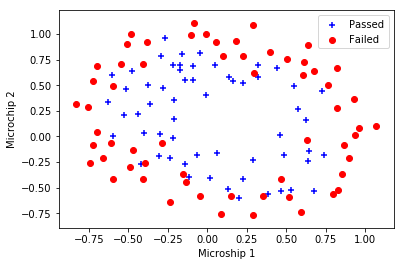

In [5]:
# visualize the data points
positive = data[data['passed/failed'].isin([1])]
negative = data[data['passed/failed'].isin([0])]
plt.scatter(positive['test1'],positive['test2'], c = 'blue', marker = '+', label = 'Passed')
plt.scatter(negative['test1'],negative['test2'], c = 'red', marker = 'o', label = 'Failed')
plt.legend()
plt.xlabel('Microship 1')
plt.ylabel('Microchip 2')
plt.show()

Figure shows we can not plot a linear boundary in this data. So, simple logistic regression can not be used as simple logistic regression will draw a linear decision boundary.

One way to fit the data is to create more features usinghigher order polynomials so we will map features upto sixth power, so that we will have 28 features insead of two. when classifier is trained on a higher polynomial feature vector then it will create a non linear decision boundary which is our goal in this task. But these kind of models are more susceptible to overfitting.

In [19]:
# slicing iinitial input deatures and label in X and y
X = data.iloc[:,0:2]
y = data.iloc[:,2]

As from the data plot, we came to know that a linear boundary is not possible in this data set then one way to fit the data is create more features from teo features. so we will map all the polynomial features upto power 6 from two simple features.

In [38]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))
    return out
x = mapFeature(X.iloc[:,0], X.iloc[:,1])
x

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [8]:
m,n = x.shape
theta = np.zeros((n,1))

In [9]:
y = y[:,np.newaxis]   # increasing y's dimension

In [10]:
# checking shape before matrix multiplication
x.shape, theta.shape, y.shape

((118, 28), (28, 1), (118, 1))

In [11]:
# sigmid function
import numpy as np
def sigmoid(z):
    return 1/(1 + (np.exp(-z)))
sigmoid(0)

0.5

In [12]:
#cost function
def cost(theta, x,y,lambd):
    theta_temp = theta[1:]
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(x @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(x @ theta)))) + ((lambd/2*m)*np.sum(np.power(theta_temp,2)))
    return J 

In [13]:
# implementing cost function without optimized theta
cost(theta,x,y,1)

0.6931471805599454

In [14]:
# Gradient Descent definition
def gradient(theta, x,y ,lambd):
    m = len(x)
    grad = np.zeros((m,1))
    grad = ((1/m) * x.T @ (sigmoid(x @ theta) - y))
    grad[1:] = grad[1:] + (lambd/m) * (theta[1:])
    return grad                         

In [15]:
# optimizing cost function using scipy library
# flatten theta and y because fmin_tnc do not work with 2 d array
lambd = 1
out = opt.fmin_tnc(func = cost, x0 = theta.flatten(), fprime = gradient, args = (x,y.flatten(), lambd))
theta_optimized = out[0]
print(theta_optimized)

[ 2.49640504e-04  1.37411664e-04  2.77015264e-04 -4.35864523e-04
 -1.62448946e-04 -2.48689519e-04  3.40749794e-05 -7.16770320e-05
 -7.34919150e-05 -2.03237594e-05 -3.10561369e-04 -1.49837678e-05
 -1.31827480e-04 -4.36565248e-05 -2.29977884e-04 -3.43138390e-05
 -4.33024117e-05 -1.87923601e-05 -5.59544625e-05 -5.21231445e-05
 -9.08338037e-05 -2.10980729e-04  2.17307928e-06 -6.54197890e-05
 -8.84386569e-07 -6.91289403e-05 -1.78749503e-05 -1.85529268e-04]


In [16]:
# Checking the accuracy of model
pred = [sigmoid(np.dot(x, theta)) >= 0.5]
np.mean(pred == y.flatten()) * 100

49.152542372881356

I got a low accuracy of just 49% but lets check the model by decision boundary.

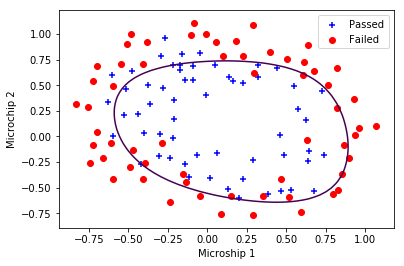

In [27]:
#draw decision boundary
SIZE = 50
u = np.linspace(-0.75, 1)
v = np.linspace(-0.75, 1)
z = np.zeros((SIZE, SIZE))
def mapFeatureForPlotting(X1, X2):
 degree = 6
 out = np.ones(1)
 for i in range(1, degree + 1):
     for j in range(i + 1):
         out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
 return out
for i in range(SIZE):
    for j in range(SIZE):
       z[i, j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta_optimized)
positive = data[data['passed/failed'].isin([1])]
negative = data[data['passed/failed'].isin([0])]
plt.scatter(positive['test1'],positive['test2'], c = 'blue', marker = '+', label = 'Passed')
plt.scatter(negative['test1'],negative['test2'], c = 'red', marker = 'o', label = 'Failed')
plt.contour(u,v,z,0)
plt.legend()
plt.xlabel('Microship 1')
plt.ylabel('Microchip 2')
plt.show()

Decision boundary shows that model is good enough to draw a decision boundary that differentiate the data very well inspite of the fact that accuracy is low. 